# Introduction

Welcome to this comprehensive notebook where we delve deep into the intriguing world of New York City's Yellow Taxi services. In the bustling streets of the city that never sleeps, these iconic taxis paint a vivid picture of the urban ebb and flow. Analyzing the Yellow Taxi Trip Records, generously provided by the Taxi and Limousine Commission (TLC) of New York City, offers fascinating insights into the city's pulse and daily rhythms.

The dataset we'll be exploring captures rich details such as pick-up and drop-off times, locations, passenger counts, trip distances, and payment types. Armed with this information, our mission is to decipher patterns and trends that might otherwise stay hidden in plain sight.

Our goal? To illuminate the intricate dynamics of the NYC Yellow Taxi service and to provide data-driven insights that could influence future operational, pricing, and technological decisions. Let's turn on the ignition and start our data-driven journey!

## Table of Contents
### 1. Data Loading and Exploration: 
This initial phase involves loading the dataset into our environment and performing a preliminary exploration to familiarize ourselves with the data structure and contents.

### 2. Data Cleaning: 
Here, we'll identify and address issues in our dataset such as missing or inconsistent values, outliers, and irrelevant information. Ensuring our data's cleanliness is paramount for the accuracy of our subsequent analysis.

### 3. Feature Engineering: 
In this section, we'll construct new features from existing data that can provide us with deeper and more nuanced insights. This step could involve creating new variables or transforming existing ones to better suit our analysis.

### 4. Data Analysis and Visualization: 
This is the heart of our notebook. We'll be applying analytical techniques to unearth patterns and trends in our data. Additionally, we'll visualize our findings using engaging and informative plots.

### 5. Conclusion and Management Summary: 
Lastly, we'll encapsulate our key findings and provide a summary that caters to decision-makers. This section aims to translate our data-driven insights into actionable recommendations.

# Data Loading and Exploration

In [284]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Plot graphs directly under the coding cells
%matplotlib inline

# Pandas display 2 digits
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [285]:
# Load the dataset
df = pd.read_csv('Yellow_Taxi_Assignment.csv')

# Load location dataset taken from "https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page"
location = pd.read_csv('taxi+_zone_lookup.csv')

# Print first 5 rows of the dataframe
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2018-01-01 12:02:01   2018-01-01 12:04:05             1.00   
1         2  2018-01-01 12:26:48   2018-01-01 12:31:29             1.00   
2         2  2018-01-01 01:28:34   2018-01-01 01:39:38             4.00   
3         1  2018-01-01 08:51:59   2018-01-01 09:01:45             1.00   
4         2  2018-01-01 01:00:19   2018-01-01 01:14:16             1.00   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.53        1.00                  N           142           163   
1           1.05        1.00                  N           140           236   
2           1.83        1.00                  N           211           158   
3           2.30        1.00                  N           249             4   
4           3.06        1.00                  N           186           142   

   payment_type  fare_amount  extra  mta_tax  tip_amount  tolls_amount  \
0             1         3.50   0.00     0.50        1.29          0.00   
1             1         6.00   0.00     0.50        1.02          0.00   
2             1         9.50   0.50     0.50        1.62          0.00   
3             2        10.00   0.00     0.50        0.00          0.00   
4             1        12.50   0.50     0.50        1.00          0.00   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  
0                   0.30          5.59                   NaN          NaN  
1                   0.30          7.82                   NaN          NaN  
2                   0.30         12.42                   NaN          NaN  
3                   0.30         10.80                   NaN          NaN  
4                   0.30         14.80                   NaN          NaN

In [286]:
location.head()

LocationID        Borough                     Zone service_zone
0           1            EWR           Newark Airport          EWR
1           2         Queens              Jamaica Bay    Boro Zone
2           3          Bronx  Allerton/Pelham Gardens    Boro Zone
3           4      Manhattan            Alphabet City  Yellow Zone
4           5  Staten Island            Arden Heights    Boro Zone

In [287]:
# View information about the dataset
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 304978 entries, 0 to 304977
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               304978 non-null  int64  
 1   tpep_pickup_datetime   304978 non-null  object 
 2   tpep_dropoff_datetime  304978 non-null  object 
 3   passenger_count        295465 non-null  float64
 4   trip_distance          304978 non-null  float64
 5   RatecodeID             295465 non-null  float64
 6   store_and_fwd_flag     295465 non-null  object 
 7   PULocationID           304978 non-null  int64  
 8   DOLocationID           304978 non-null  int64  
 9   payment_type           304978 non-null  int64  
 10  fare_amount            304978 non-null  float64
 11  extra                  304978 non-null  float64
 12  mta_tax                304978 non-null  float64
 13  tip_amount             304978 non-null  float64
 14  tolls_amount           304978 non-nu

The _'VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'store_and_fwd_flag'_, and _'payment_type'_ fields are all categorical in nature. Even though they might be represented as integers, they are likely coded identifiers that do not hold any numerical significance.

Regarding the _'PULocationID'_ and _'DOLocationID'_ fields, even though they are numeric, they represent different geographic zones and should be treated as categorical.

_tpep_pickup_datetime_ and _tpep_dropoff_datetime_ are datetime fields, and I have to convert them into datetime format for more useful analysis.

In [288]:
# Convert necessary fields to categorical
categorical_cols = ['VendorID', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type','store_and_fwd_flag']
for col in categorical_cols:
    df[col] = df[col].astype('category')
    
# Convert pickup and dropoff times to datetime format
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
df['tpep_dropoff_datetime'] = pd.to_datetime(df['tpep_dropoff_datetime'])

In [289]:
# Get summary statistics for the numerical columns
df.describe().T

count  mean    std     min   25%   50%   75%  \
passenger_count       295465.00  1.48   1.11    0.00  1.00  1.00  2.00   
trip_distance         304978.00  4.59 434.23  -16.86  1.00  1.73  3.21   
fare_amount           304978.00 13.51  12.64 -197.00  6.50  9.50 15.00   
extra                 304978.00  0.90   1.19   -6.00  0.00  0.50  1.00   
mta_tax               304978.00  0.49   0.07   -0.50  0.50  0.50  0.50   
tip_amount            304978.00  2.22   2.77  -20.00  0.00  1.86  2.95   
tolls_amount          304978.00  0.39   1.70  -13.75  0.00  0.00  0.00   
improvement_surcharge 304978.00  0.31   0.11   -1.00  0.30  0.30  0.30   
total_amount          304978.00 19.05  15.46 -198.55 10.80 14.30 20.76   
congestion_surcharge  232346.00  2.24   0.79   -2.50  2.50  2.50  2.50   
airport_fee           106217.00  0.09   0.32   -1.25  0.00  0.00  0.00   

                            max  
passenger_count            6.00  
trip_distance         177247.40  
fare_amount              455.00  
extra                     18.50  
mta_tax                    2.54  
tip_amount               115.56  
tolls_amount              96.55  
improvement_surcharge      1.00  
total_amount             561.49  
congestion_surcharge       2.75  
airport_fee                1.25

### Summary of Initial Data Exploration
The summary statistics for the numerical columns provide useful insights into the data, as well as revealing potential data issues.

- __passenger_count__: Most taxi trips have one or two passengers, with a mean value of 1.48. The maximum value is 6 which is reasonable as it's the possible max capacity of a taxi. However, there are some trips with a count of 0, which might represent rides where the number of passengers wasn't recorded correctly.

- __trip_distance__: The average trip distance is around 4.59 miles. There are some trips with negative distances, which are not possible and must be data entry errors. Also, the maximum value is excessively high at 177247.4 miles, which is unlikely for a single taxi trip and is probably another data error.

- __fare_amount__: The average fare amount is about \\$13.51, but the minimum is a negative value (-\\$197), which doesn't make sense as fares can't be negative. This could be due to data entry errors.

- __extra__: This field represents extra charges and has a minimum value of -\\$6.00 and a maximum value of \\$18.50. Negative extra charges are unexpected and should be investigated further.

- __mta_tax__: This field, indicating a \\$0.50 MTA tax, has some values that are negative or more than \\$0.50, suggesting potential data errors..

- __tip_amount__: Tips average around \\$2.22, but the dataset contains some negative values, which don't make sense in this context.

- __tolls_amount__: This column contains some negative values as well. As tolls can't be negative, these values must be errors.

- __improvement_surcharge__: This field has a consistent value of \\$0.30 for most records, but there are some instances where the values are negative or exceed the typical amount. These anomalies suggest possible data errors.

- __total_amount__: The minimum total fare is -\\$198.55, which is not possible, indicating data errors in this column too.

- __congestion_surcharge__: Most entries show a congestion surcharge of \\$2.50, but there are also negative values in this field, which could be a data entry issue.

- __airport_fee__: It's mainly \\$0.00 or \\$1.25 for pickup at LaGuardia and John F. Kennedy Airports, however, there are negative values which don't make sense.


These observations suggest there might be some data quality issues that need further investigation. The next step would be to clean the data by addressing these issues.

# Data Cleaning

In this part I will take 3 steps to clean the data, Negative Values, Unrealistic Outliers and Missing Data.

## 1. Negative Values
Several columns including _trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge_, and _airport_fee_ have negative values, which are not possible given their nature.

To deal with these, I'll replace negative values with NaN, indicating missing data, and then use appropriate imputation strategies.

In [290]:
# Replace negative values with NaN
numeric_cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 
                'improvement_surcharge', 'total_amount', 'congestion_surcharge', 'airport_fee']

for col in numeric_cols:
    df.loc[df[col] < 0, col] = np.nan

## 2. Missing Data
Missing data was identified in the _passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge_, and _airport_fee_ columns. I'll handle these by implementing suitable imputation strategies.

And since I've replaced the negative values with 'np.nan', these are now technically missing value in the dataset. Columns like _mta_tax, improvement_surcharge, airport_fee_ should be treated different, because they are essantially categorical.

In [291]:
# For categorical columns 'RatecodeID', 'store_and_fwd_flag', fill missing values with the mode (most common value)
df['RatecodeID'].fillna(df['RatecodeID'].mode()[0], inplace=True)
df['store_and_fwd_flag'].fillna(df['store_and_fwd_flag'].mode()[0], inplace=True)

# For 'passenger_count', assume a missing passenger count likely means there was at least 1 passenger, and as single-passenger trips are the most common
df['passenger_count'].fillna(1, inplace=True)

# For 'congestion_surcharge' and 'airport_fee', assume that if the value is missing, no surcharge or fee was applied, so I'll fill with 0
df['congestion_surcharge'].fillna(0, inplace=True)
df['airport_fee'].fillna(0, inplace=True)

Before deciding which imputation (_Imputation with Mean/Median, Imputation with mode, Imputation with zero_) will be done for which value. I will create histogram plots to see skewness of the values

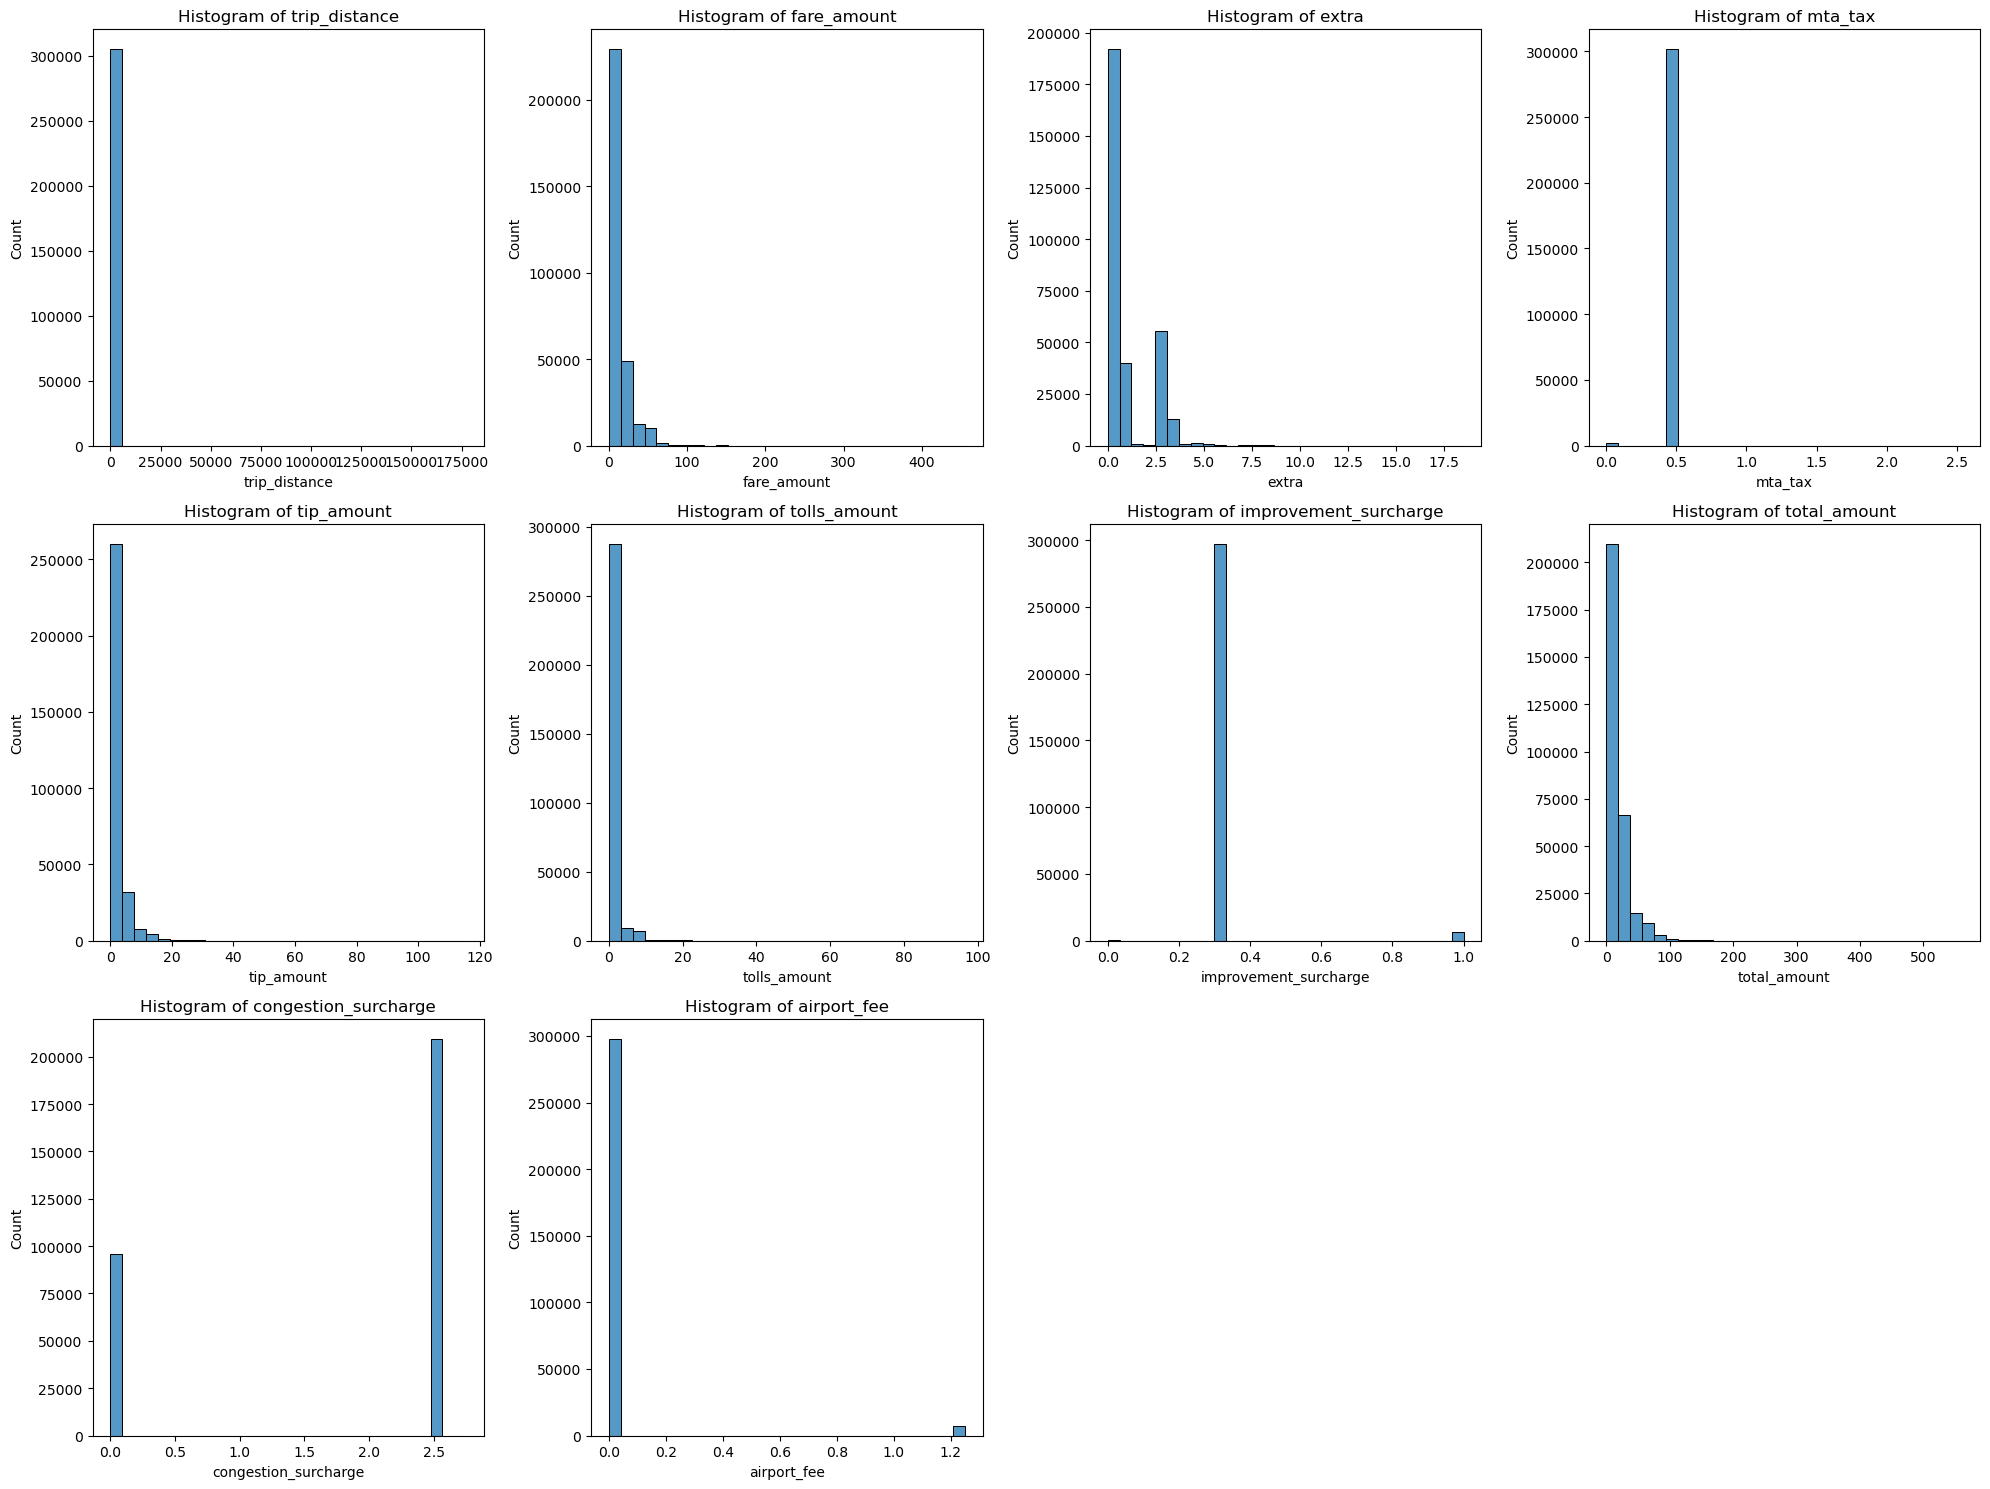

In [292]:
# List of columns for negative numerical values replaced with np.nan
cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 
        'tolls_amount', 'improvement_surcharge', 'total_amount', 
        'congestion_surcharge', 'airport_fee']

# Determine the number of rows and columns for subplot grid
n_rows = len(cols) // 4 + (len(cols) % 4 > 0)
n_cols = 4

# Create a larger figure
plt.figure(figsize=(20, 5 * n_rows))

for i, col in enumerate(cols):
    plt.subplot(n_rows, n_cols, i+1)
    sns.histplot(df[col], bins=30, kde=False)
    plt.title(f'Histogram of {col}')

plt.tight_layout()
plt.show()

In [293]:
# For numerical columns 'trip_distance', 'fare_amount', 'tip_amount' and 'total_amount' 
# fill missing values with the median since all of them has skewness
cols = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']
for col in cols:
    df[col].fillna(df[col].median(), inplace = True)

# For essentially categorical columns 'extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge'
# and 'airport_fee' fill missing values with the mode (most common value)
cols = ['extra', 'mta_tax', 'improvement_surcharge', 'congestion_surcharge', 'airport_fee']
for col in cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# For 'tolls_amount', assume a missing value implies for zero
df['tolls_amount'].fillna(0, inplace=True)

## 3. Unrealistic Outliers
I noticed a significantly high maximum _fare_amount, extra, mta_tax, tip_amount, tolls_amount, total_amount_ which seems to be an outlier. I'll handle this by defining an upper limit (like 99th percentile) for the columns, and setting any values beyond this limit 99th percentile

In [294]:
# Handle outliers in 'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount'
cols = ['trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount']

for col in cols:
    # Calculate the 99th percentile of the column
    percentile_99 = df[col].quantile(0.99)

    # Replace outliers that are higher than the 99th percentile with the value of the 99th percentile
    df.loc[df[col] > percentile_99, col] = percentile_99

In [295]:
# Recheck the summary statistics
df.describe().T

count  mean   std  min   25%   50%   75%   max
passenger_count       304978.00  1.46  1.09 0.00  1.00  1.00  1.00  6.00
trip_distance         304978.00  3.09  3.82 0.00  1.00  1.73  3.21 19.50
fare_amount           304978.00 13.39 11.19 0.00  6.50  9.50 15.00 57.00
extra                 304978.00  0.89  1.14 0.00  0.00  0.50  1.00  3.50
mta_tax               304978.00  0.50  0.04 0.00  0.50  0.50  0.50  0.50
tip_amount            304978.00  2.18  2.45 0.00  0.00  1.86  2.95 12.65
tolls_amount          304978.00  0.36  1.45 0.00  0.00  0.00  0.00  6.55
improvement_surcharge 304978.00  0.32  0.10 0.00  0.30  0.30  0.30  1.00
total_amount          304978.00 18.97 13.95 0.00 10.80 14.63 20.76 76.60
congestion_surcharge  304978.00  1.72  1.16 0.00  0.00  2.50  2.50  2.75
airport_fee           304978.00  0.03  0.19 0.00  0.00  0.00  0.00  1.25

## Summary of Data Cleaning
In the data cleaning stage, I addressed various data quality issues identified during the initial exploration. Here's a summary:

- __Negative Values__: Negative values in several numerical columns were replaced with NaN as they are not feasible in the real world context. These included _trip_distance, fare_amount, extra, mta_tax, tip_amount, tolls_amount, improvement_surcharge, total_amount, congestion_surcharge_, and _airport_fee_. And then imputation applied according to their behaviour

- __Missing Data__: Missing data in _passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge_, and _airport_fee_ were handled using suitable imputation strategies.

- __Unrealistic Outliers__: Extreme outliers in the _'trip_distance', 'fare_amount', 'extra', 'mta_tax', 'tip_amount', 'tolls_amount', 'total_amount'_ columns were replaced with 99th percentile, specifically those above the 99th percentile of the data.

The final output from df.describe() after cleaning shows that the data is now more realistic and ready for the next stages. The minimum values of the columns are no longer negative, and the maximum trip_distance is within a feasible range.

Next, I'll proceed with feature engineering, where I'll create new variables that may enhance the model's ability to understand the data and make accurate predictions.

# Feature Engineering

In this part of the analysis, I'm going to delve deeper into the dataset by creating new features that can help expose more valuable insights. The significance of feature engineering lies in its capacity to boost the performance of machine learning models, as well as to fully harness the available data.

I will be creating new features such as the _duration of the trip, the time of pickup, the speed of the trip, and others_. These features are selected based on their potential relevance and expected contribution to the subsequent analysis.

In [296]:
# Create a new column 'trip_duration' in minutes that is derived from 'tpep_dropoff_datetime' and 'tpep_pickup_datetime'
df['trip_duration'] = round((df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.seconds / 60,2)

In [297]:
df.describe().T

count  mean   std  min   25%   50%   75%     max
passenger_count       304978.00  1.46  1.09 0.00  1.00  1.00  1.00    6.00
trip_distance         304978.00  3.09  3.82 0.00  1.00  1.73  3.21   19.50
fare_amount           304978.00 13.39 11.19 0.00  6.50  9.50 15.00   57.00
extra                 304978.00  0.89  1.14 0.00  0.00  0.50  1.00    3.50
mta_tax               304978.00  0.50  0.04 0.00  0.50  0.50  0.50    0.50
tip_amount            304978.00  2.18  2.45 0.00  0.00  1.86  2.95   12.65
tolls_amount          304978.00  0.36  1.45 0.00  0.00  0.00  0.00    6.55
improvement_surcharge 304978.00  0.32  0.10 0.00  0.30  0.30  0.30    1.00
total_amount          304978.00 18.97 13.95 0.00 10.80 14.63 20.76   76.60
congestion_surcharge  304978.00  1.72  1.16 0.00  0.00  2.50  2.50    2.75
airport_fee           304978.00  0.03  0.19 0.00  0.00  0.00  0.00    1.25
trip_duration         304978.00 17.50 68.62 0.00  6.60 11.03 18.07 1439.98

There are still some outliers caused by trip duration. Since it is a newly featured column and I cleaned all of the data before, I believe the problem is caused by the difference between pick up and drop off times. I'll investigate how many rows have pick up times later than or equal to the drop off times

In [298]:
# Calculate how many rows has older drop off times
rows_with_wrong_times = len(df.loc[df['tpep_pickup_datetime'] >= df['tpep_dropoff_datetime']])
print("There are " + str(rows_with_wrong_times)  + " rows that have the wrong times.")

# Calculate the percentage of these wrong times across all the data
percentage = round(len(df.loc[df['tpep_pickup_datetime'] >= df['tpep_dropoff_datetime']]) * 100 / len(df),2)
print(str(percentage) + "% of the data that has wrong pick up and drop off times")


There are 400 rows that have the wrong times.
0.13% of the data that has wrong pick up and drop off times


These wrong entries represent about 0.13% of the total data, a relatively small fraction. Therefore, I have decided to remove these rows from the dataset to maintain the overall integrity of my analysis. I believe that this will have a minimal impact on the final results of my analysis due to the small proportion of affected data.

In [299]:
# Remove wrong datetime entries
df = df[df['tpep_pickup_datetime'] < df['tpep_dropoff_datetime']]

In [300]:
df.describe().T

count  mean   std  min   25%   50%   75%     max
passenger_count       304578.00  1.46  1.09 0.00  1.00  1.00  1.00    6.00
trip_distance         304578.00  3.09  3.82 0.00  1.00  1.73  3.21   19.50
fare_amount           304578.00 13.39 11.18 0.00  6.50  9.50 15.00   57.00
extra                 304578.00  0.89  1.14 0.00  0.00  0.50  1.00    3.50
mta_tax               304578.00  0.50  0.04 0.00  0.50  0.50  0.50    0.50
tip_amount            304578.00  2.18  2.45 0.00  0.00  1.88  2.95   12.65
tolls_amount          304578.00  0.36  1.45 0.00  0.00  0.00  0.00    6.55
improvement_surcharge 304578.00  0.32  0.10 0.00  0.30  0.30  0.30    1.00
total_amount          304578.00 18.96 13.95 0.00 10.80 14.63 20.76   76.60
congestion_surcharge  304578.00  1.72  1.16 0.00  0.00  2.50  2.50    2.75
airport_fee           304578.00  0.03  0.19 0.00  0.00  0.00  0.00    1.25
trip_duration         304578.00 16.72 59.94 0.02  6.62 11.03 18.07 1439.87

There is still an outlier for _trip_duration_. Eventhough 75% quatile of the data has 18.07, the max _trip_duration_ is 1439.98. To solve this problem I will apply winsorizing method

In [301]:
# Calculate the 99th percentile of the trip_duration
percentile_99 = df['trip_duration'].quantile(0.99)

# Replace outliers that are higher than the 99th percentile with the value of the 99th percentile
df.loc[df['trip_duration'] > percentile_99, 'trip_duration'] = percentile_99

In [302]:
df.describe().T

count  mean   std  min   25%   50%   75%   max
passenger_count       304578.00  1.46  1.09 0.00  1.00  1.00  1.00  6.00
trip_distance         304578.00  3.09  3.82 0.00  1.00  1.73  3.21 19.50
fare_amount           304578.00 13.39 11.18 0.00  6.50  9.50 15.00 57.00
extra                 304578.00  0.89  1.14 0.00  0.00  0.50  1.00  3.50
mta_tax               304578.00  0.50  0.04 0.00  0.50  0.50  0.50  0.50
tip_amount            304578.00  2.18  2.45 0.00  0.00  1.88  2.95 12.65
tolls_amount          304578.00  0.36  1.45 0.00  0.00  0.00  0.00  6.55
improvement_surcharge 304578.00  0.32  0.10 0.00  0.30  0.30  0.30  1.00
total_amount          304578.00 18.96 13.95 0.00 10.80 14.63 20.76 76.60
congestion_surcharge  304578.00  1.72  1.16 0.00  0.00  2.50  2.50  2.75
airport_fee           304578.00  0.03  0.19 0.00  0.00  0.00  0.00  1.25
trip_duration         304578.00 14.18 11.20 0.02  6.62 11.03 18.07 61.13

Now I can move forward on feature engineering

In [303]:
# Create new columns for 'pickup_hour', 'pickup_day_of_week' and pickup_month
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month

# Avoid division by zero by adding a small number (epsilon) to the denominator
epsilon = 0.000001

# Create a new column 'average_speed_mph' that is derived from 'trip_distance' and 'trip_duration'
df['average_speed_mph'] = df['trip_distance'] / ((df['trip_duration'] + epsilon) / 60)

# Create a new column ' fare_per_mile' that is derived form 'trip_distance' and 'fare_amount'
df['fare_per_mile'] = df['fare_amount'] / (df['trip_distance'] + epsilon)

# Create the 'tip_percentage' feature and multiply by 100 to get a percentage
df['tip_percentage'] = (df['tip_amount'] / (df['fare_amount'] + epsilon)) * 100

# Create the 'is_airport' feature
df['is_airport'] = ((df['RatecodeID'].isin([2, 3])) | (df['airport_fee'] > 0)).astype(bool)

# Check the first few rows to verify
df.head()


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0        2  2018-01-01 12:02:01   2018-01-01 12:04:05             1.00   
1        2  2018-01-01 12:26:48   2018-01-01 12:31:29             1.00   
2        2  2018-01-01 01:28:34   2018-01-01 01:39:38             4.00   
3        1  2018-01-01 08:51:59   2018-01-01 09:01:45             1.00   
4        2  2018-01-01 01:00:19   2018-01-01 01:14:16             1.00   

   trip_distance RatecodeID store_and_fwd_flag PULocationID DOLocationID  \
0           0.53       1.00                  N          142          163   
1           1.05       1.00                  N          140          236   
2           1.83       1.00                  N          211          158   
3           2.30       1.00                  N          249            4   
4           3.06       1.00                  N          186          142   

  payment_type  ...  congestion_surcharge  airport_fee  trip_duration  \
0            1  ...                  0.00         0.00           2.07   
1            1  ...                  0.00         0.00           4.68   
2            1  ...                  0.00         0.00          11.07   
3            2  ...                  0.00         0.00           9.77   
4            1  ...                  0.00         0.00          13.95   

   pickup_hour  pickup_day_of_week  pickup_month  average_speed_mph  \
0           12                   0             1              15.36   
1           12                   0             1              13.46   
2            1                   0             1               9.92   
3            8                   0             1              14.12   
4            1                   0             1              13.16   

   fare_per_mile  tip_percentage  is_airport  
0           6.60           36.86       False  
1           5.71           17.00       False  
2           5.19           17.05       False  
3           4.35            0.00       False  
4           4.08            8.00       False  

[5 rows x 27 columns]

In [304]:
# Convert necessary fields to categorical
for col in ['pickup_hour', 'pickup_day_of_week', 'pickup_month']:
    df[col] = df[col].astype('category')

In [305]:
df.describe().T

count      mean        std  min   25%   50%   75%  \
passenger_count       304578.00      1.46       1.09 0.00  1.00  1.00  1.00   
trip_distance         304578.00      3.09       3.82 0.00  1.00  1.73  3.21   
fare_amount           304578.00     13.39      11.18 0.00  6.50  9.50 15.00   
extra                 304578.00      0.89       1.14 0.00  0.00  0.50  1.00   
mta_tax               304578.00      0.50       0.04 0.00  0.50  0.50  0.50   
tip_amount            304578.00      2.18       2.45 0.00  0.00  1.88  2.95   
tolls_amount          304578.00      0.36       1.45 0.00  0.00  0.00  0.00   
improvement_surcharge 304578.00      0.32       0.10 0.00  0.30  0.30  0.30   
total_amount          304578.00     18.96      13.95 0.00 10.80 14.63 20.76   
congestion_surcharge  304578.00      1.72       1.16 0.00  0.00  2.50  2.50   
airport_fee           304578.00      0.03       0.19 0.00  0.00  0.00  0.00   
trip_duration         304578.00     14.18      11.20 0.02  6.62 11.03 18.07   
average_speed_mph     304578.00     15.19     238.54 0.00  7.83 10.50 14.35   
fare_per_mile         304578.00 254323.64 3156157.55 0.00  4.19  5.31  6.79   
tip_percentage        304578.00   1111.81  546869.29 0.00  0.00 21.78 28.00   

                               max  
passenger_count               6.00  
trip_distance                19.50  
fare_amount                  57.00  
extra                         3.50  
mta_tax                       0.50  
tip_amount                   12.65  
tolls_amount                  6.55  
improvement_surcharge         1.00  
total_amount                 76.60  
congestion_surcharge          2.75  
airport_fee                   1.25  
trip_duration                61.13  
average_speed_mph         55047.25  
fare_per_mile          57000000.00  
tip_percentage        300000000.00

Upon examining the statistical summary of our dataset with the describe() function, I have identified potential outliers in the average_speed_mph, fare_per_mile, and tip_percentage columns. These outliers are values that are significantly different from the rest of the data and could potentially skew the analysis or the performance of any predictive model will be applied.

I decided to cap the outliers in the lower 5% and upper 95% of the distribution. This strategy prevents the removal of these values, therefore retaining as much information as possible, while also minimizing the impact of these extreme values on our analysis.

In [307]:
# Create array for problematic columns
cols = ['average_speed_mph','fare_per_mile','tip_percentage']

for col in cols:
    # Define quantiles
    q5 = df[col].quantile(0.05)
    q95 = df[col].quantile(0.95)
    
    # Apply winsorization
    df[col] = np.where(df[col] < q5, q5, np.where(df[col] > q95, q95, df[col]))

In [308]:
df.describe().T

count  mean   std  min   25%   50%   75%   max
passenger_count       304578.00  1.46  1.09 0.00  1.00  1.00  1.00  6.00
trip_distance         304578.00  3.09  3.82 0.00  1.00  1.73  3.21 19.50
fare_amount           304578.00 13.39 11.18 0.00  6.50  9.50 15.00 57.00
extra                 304578.00  0.89  1.14 0.00  0.00  0.50  1.00  3.50
mta_tax               304578.00  0.50  0.04 0.00  0.50  0.50  0.50  0.50
tip_amount            304578.00  2.18  2.45 0.00  0.00  1.88  2.95 12.65
tolls_amount          304578.00  0.36  1.45 0.00  0.00  0.00  0.00  6.55
improvement_surcharge 304578.00  0.32  0.10 0.00  0.30  0.30  0.30  1.00
total_amount          304578.00 18.96 13.95 0.00 10.80 14.63 20.76 76.60
congestion_surcharge  304578.00  1.72  1.16 0.00  0.00  2.50  2.50  2.75
airport_fee           304578.00  0.03  0.19 0.00  0.00  0.00  0.00  1.25
trip_duration         304578.00 14.18 11.20 0.02  6.62 11.03 18.07 61.13
average_speed_mph     304578.00 11.75  5.42 4.58  7.83 10.50 14.35 25.13
fare_per_mile         304578.00  5.73  2.09 3.00  4.19  5.31  6.79 10.98
tip_percentage        304578.00 17.63 13.37 0.00  0.00 21.78 28.00 38.86

During feature engineering, I enhanced the dataset by creating new variables such as _trip_duration, average_speed_mph, fare_per_mile, tip_percentage, and is_airport_ to reveal more insights for analysis. I also extracted time, date and month features from pickup datetime to study taxi usage patterns. Special care was taken while creating these features to avoid issues like division by zero and outliers. Outliers in _average_speed_mph, fare_per_mile_, and _tip_percentage_ were handled using winsorization. With these newly engineered features, the dataset is now ready for further analysis and model building.

Before moving forward I will merge taxi dataframe and location dataframe for geographical analysis.

In [309]:
# Merge the two dataframes and replace PULocationID and DOLocationID with Zone
merged_df = pd.merge(df, location[['LocationID', 'Zone']], left_on='PULocationID', right_on='LocationID', how='left')
merged_df.rename(columns={'Zone': 'pickup_zone'}, inplace=True)
merged_df.drop(columns=['LocationID'], inplace=True)
merged_df = pd.merge(merged_df, location[['LocationID', 'Zone']], left_on='DOLocationID', right_on='LocationID', how='left')
merged_df.rename(columns={'Zone': 'dropoff_zone'}, inplace=True)
merged_df.drop(columns=['LocationID'], inplace=True)

# Print the merged dataframe
df = merged_df
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0        2  2018-01-01 12:02:01   2018-01-01 12:04:05             1.00   
1        2  2018-01-01 12:26:48   2018-01-01 12:31:29             1.00   
2        2  2018-01-01 01:28:34   2018-01-01 01:39:38             4.00   
3        1  2018-01-01 08:51:59   2018-01-01 09:01:45             1.00   
4        2  2018-01-01 01:00:19   2018-01-01 01:14:16             1.00   

   trip_distance RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           0.53       1.00                  N           142           163   
1           1.05       1.00                  N           140           236   
2           1.83       1.00                  N           211           158   
3           2.30       1.00                  N           249             4   
4           3.06       1.00                  N           186           142   

  payment_type  ...  trip_duration  pickup_hour  pickup_day_of_week  \
0            1  ...           2.07           12                   0   
1            1  ...           4.68           12                   0   
2            1  ...          11.07            1                   0   
3            2  ...           9.77            8                   0   
4            1  ...          13.95            1                   0   

   pickup_month  average_speed_mph  fare_per_mile  tip_percentage  is_airport  \
0             1              15.36           6.60           36.86       False   
1             1              13.46           5.71           17.00       False   
2             1               9.92           5.19           17.05       False   
3             1              14.12           4.35            0.00       False   
4             1              13.16           4.08            8.00       False   

                    pickup_zone                   dropoff_zone  
0           Lincoln Square East                  Midtown North  
1               Lenox Hill East          Upper East Side North  
2                          SoHo  Meatpacking/West Village West  
3                  West Village                  Alphabet City  
4  Penn Station/Madison Sq West            Lincoln Square East  

[5 rows x 29 columns]

# Data Analysis & Visualization

In this section, I will delve deeper into the data and explore a wide range of questions to extract meaningful insights and trends. The goal is to better understand the dynamics of New York City's taxi rides, which can provide valuable insights for various stakeholders such as taxi drivers, taxi companies, city planners, and even passengers.

The analysis will focus on several dimensions including temporal trends, geographical patterns, fare and tip dynamics, speed and efficiency of rides, passenger trends, airport trips, and payment methods.

- __Temporal Trends__: I'll analyze how the demand for taxi rides has changed over time, and identify peak hours, days, or months for taxi rides.

- __Geographical Trends__: I'll examine the most popular pickup and drop-off locations and investigate if there are any specific routes that are more popular than others.

- __Fare Analysis__: I'll track how the average fare has evolved over time and observe if fare varies based on the time of day, day of the week, or month.

- __Tip Trends__: I'll uncover patterns in tipping behavior and determine if tip percentage changes based on factors like the time of the trip, duration, or distance.

- __Speed and Efficiency__: I'll evaluate the average speed of trips and check if the speed fluctuates based on the time of day or specific routes.

- __Passenger Trends__: I'll study if there's a trend in the number of passengers per trip and whether the number of passengers influences fare or tip amount.

- __Airport Trips__: I'll calculate what percentage of trips are to/from the airport and how this has changed over time, as well as detect specific trends in airport trips in terms of fare, tips, or duration.

- __Payment Method Trends__: Lastly, I'll assess trends in the use of different payment methods and find out if there's a correlation between the payment method and the tip amount or percentage.

The findings from this analysis will not only help to understand the current situation but also predict future trends, identify potential areas for improvement, and ultimately contribute to a more efficient and user-friendly taxi system.

## Temporal Analysis
### Questions
1. How has the demand for taxi rides changed over time?
2. What are the peak hours for taxi rides during a day? Are there any trends noticeable during specific days of the week or months of the year?

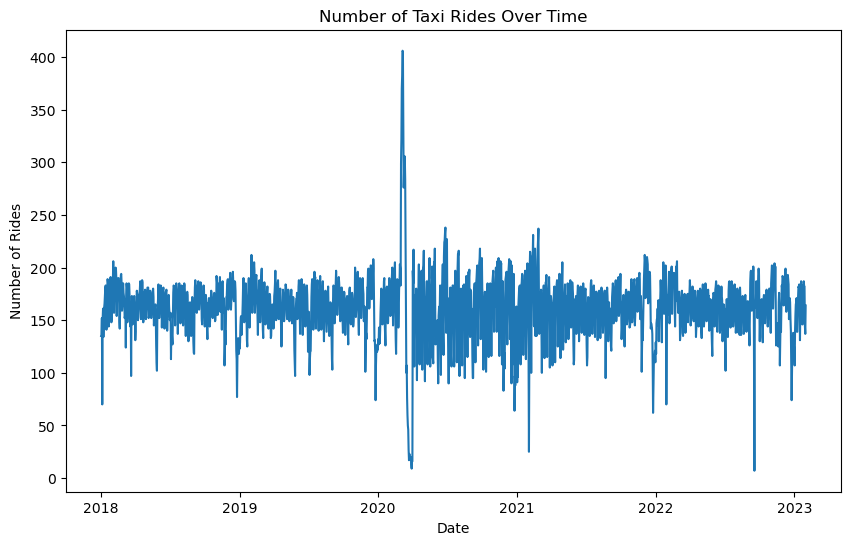

In [310]:
# First, we'll group by the date and count the number of rides per date.
ride_counts_by_date = df.groupby(df.tpep_pickup_datetime.dt.date).size()

# Now we plot the data
plt.figure(figsize=(10, 6))
ride_counts_by_date.plot(kind='line')
plt.title('Number of Taxi Rides Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.show()


"Number of Taxi Rides over Time" graph shows that the number of taxi rides does not exhibit a specific trend; instead, it resembles white noise, indicating a random pattern with no clear structure or predictability. However, a substantial deviation from this pattern is seen in March 2020, coinciding with the onset of the COVID-19 pandemic.

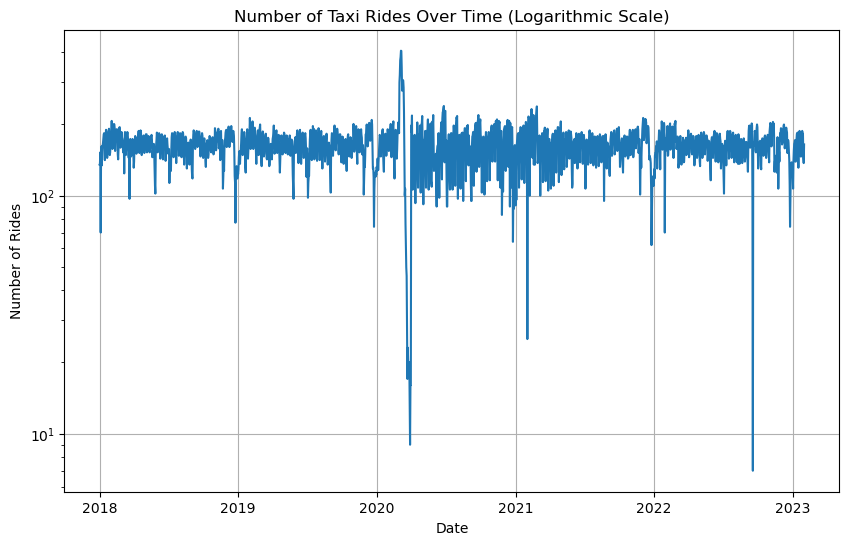

In [311]:
# First, we'll group by the date and count the number of rides per date.
ride_counts_by_date = df.groupby(df.tpep_pickup_datetime.dt.date).size()

# Now we plot the data
plt.figure(figsize=(10, 6))
plt.semilogy(ride_counts_by_date)
plt.title('Number of Taxi Rides Over Time (Logarithmic Scale)')
plt.xlabel('Date')
plt.ylabel('Number of Rides')
plt.grid(True)
plt.show()


The same randomness is observed even when the data is transformed into a logarithmic scale. The drop in taxi rides in March 2020 becomes more pronounced, indicating a decrease by an order of magnitude. Interestingly, after this significant drop, the pattern of white noise resumes. However, there are six notable spikes that dip downwards.

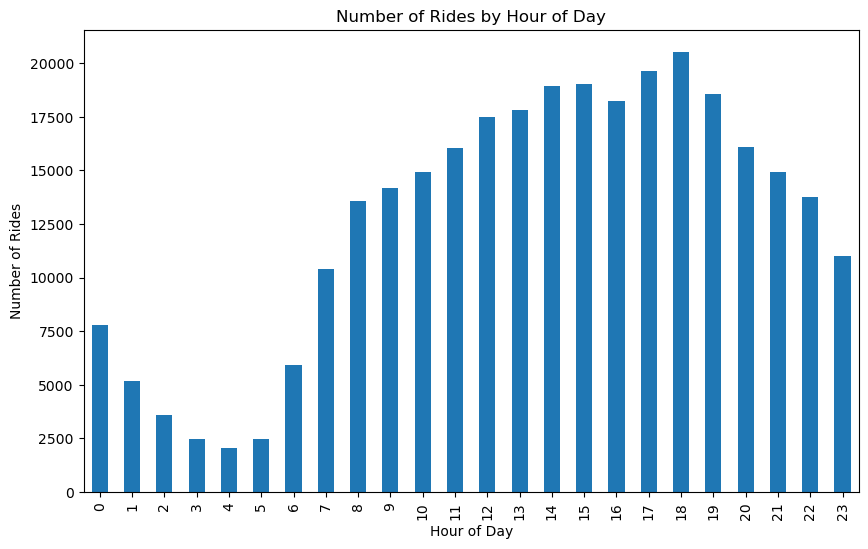

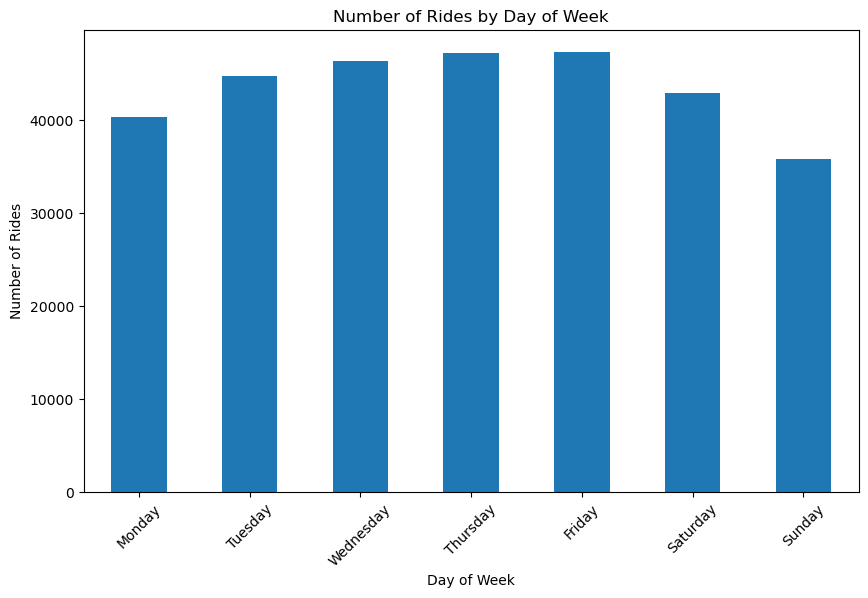

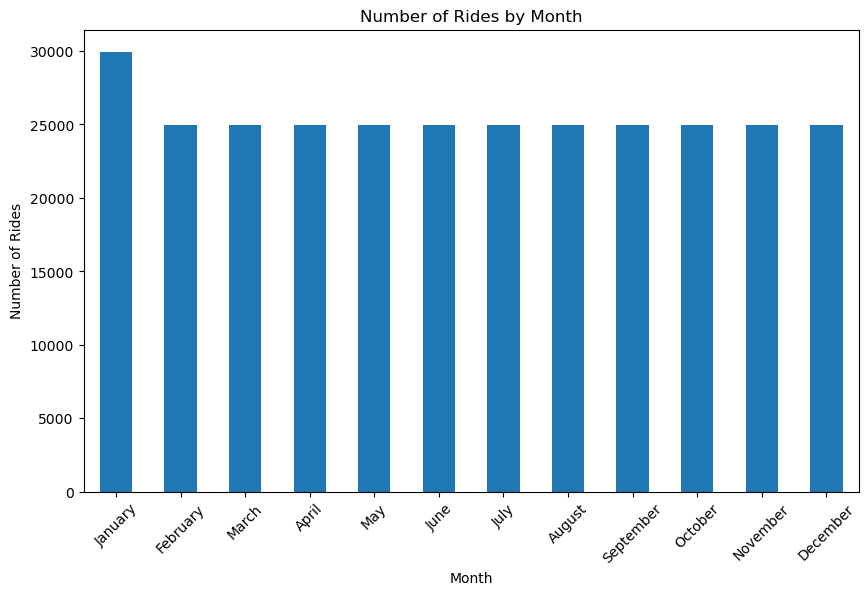

In [312]:
# For hour of the day
plt.figure(figsize=(10, 6))
df['pickup_hour'].value_counts(sort=False).plot(kind='bar')
plt.title('Number of Rides by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Rides')
plt.show()

# For day of the week
# Define the day names
day_names = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

plt.figure(figsize=(10, 6))
df['pickup_day_of_week'].value_counts(sort=False).plot(kind='bar')
plt.title('Number of Rides by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Rides')
plt.xticks(ticks=range(7), labels=day_names, rotation=45)  # Set custom tick labels
plt.show()

# For month of the year
# Define the month names
month_names = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September',
            'October','November', 'December']

plt.figure(figsize=(10, 6))
df['pickup_month'].value_counts(sort=False).plot(kind='bar')
plt.title('Number of Rides by Month')
plt.xlabel('Month')
plt.ylabel('Number of Rides')
plt.xticks(ticks=range(12), labels=month_names, rotation=45)  # Set custom tick labels
plt.show()


#### Hourly Trends:
- The lowest taxi pickup numbers are observed during the early morning hours between 2-5 AM, with the absolute lowest at 4 AM which has 2,052 rides.
- The numbers start increasing from 5 AM, with a significant increase observed at 6 AM (5,937 rides), likely marking the start of morning commute hours.
- The highest demand is seen from 5 PM to 7 PM, with the absolute maximum at 6 PM (20,520 rides), which may be due to a combination of evening commute and early leisure activities.
- After the peak, a gradual decline is observed post 7 PM, with a more rapid decline after 10 PM, marking the end of typical leisure hours.

#### Weekly Trends:
- Taxi demand seems to follow a weekly pattern. The busiest days are mid-week, specifically Wednesday (46,339 rides) and Thursday (47,210 rides).
- The number of rides then start to decrease, with the lowest demand observed on Sunday (35,795 rides), which is likely due to lower commuting needs and activities during the weekend.

#### Monthly Trends:
- The demand for taxi rides appears to be fairly consistent throughout the year, with each month observing roughly 25,000 rides. This indicates a stable demand irrespective of the season, suggesting that external factors such as weather conditions have a minimal impact on taxi usage.

What are the most popular pickup and drop-off locations?
Are there any specific routes that are more popular than others?

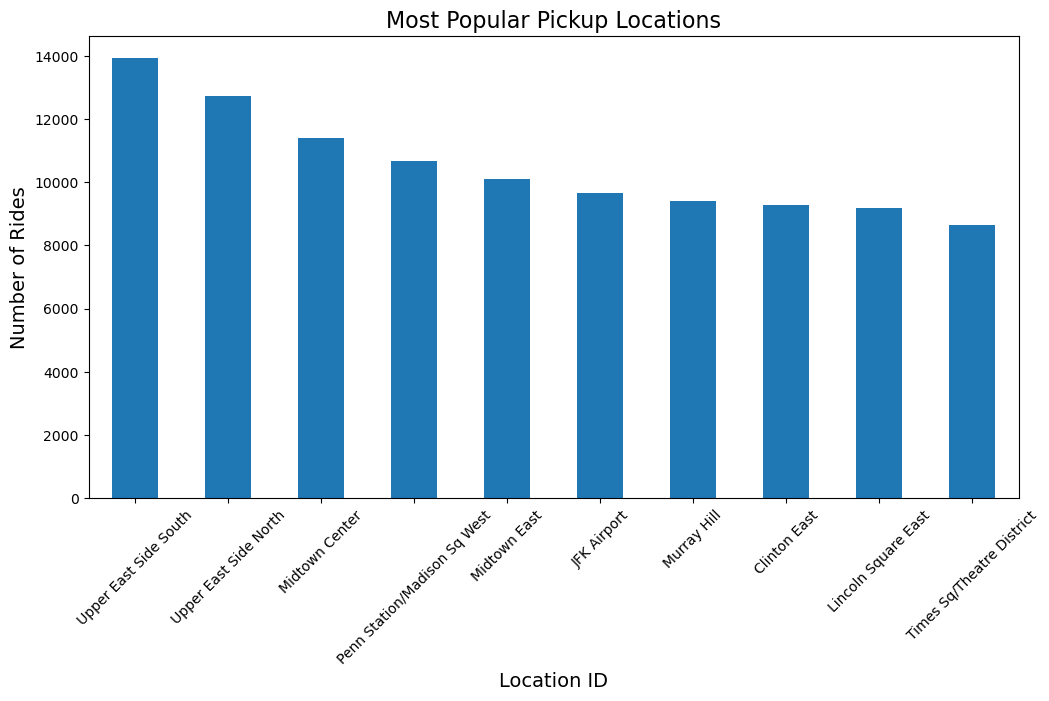

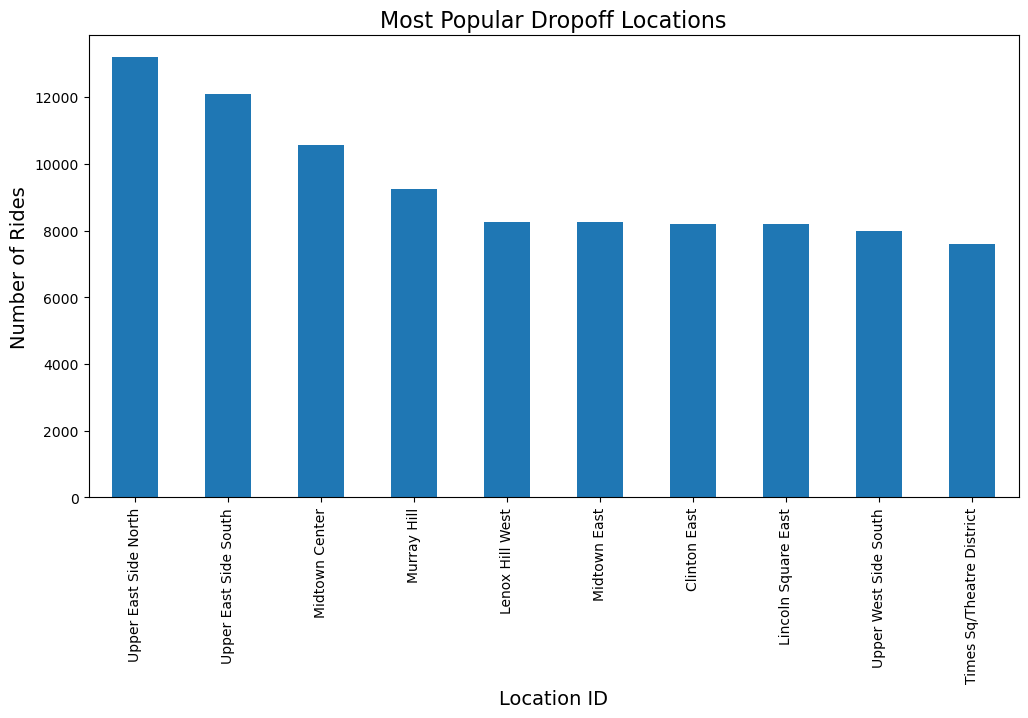

In [552]:
# Most popular pickup locations
pickup_locations = df['pickup_zone'].value_counts().head(10)

# Plot the most popular pickup locations
plt.figure(figsize=(12,6))
pickup_locations.plot(kind='bar')
plt.title('Most Popular Pickup Locations', fontsize=16)
plt.xlabel('Location ID', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
plt.xticks(rotation=45)  # Set custom tick labels
plt.show()

# Most popular drop-off locations
dropoff_locations = df['dropoff_zone'].value_counts().head(10)

# Plot the most popular drop-off locations
plt.figure(figsize=(12,6))
dropoff_locations.plot(kind='bar')
plt.title('Most Popular Dropoff Locations', fontsize=16)
plt.xlabel('Location ID', fontsize=14)
plt.ylabel('Number of Rides', fontsize=14)
#plt.xticks(rotation=45)  # Set custom tick labels
plt.show()


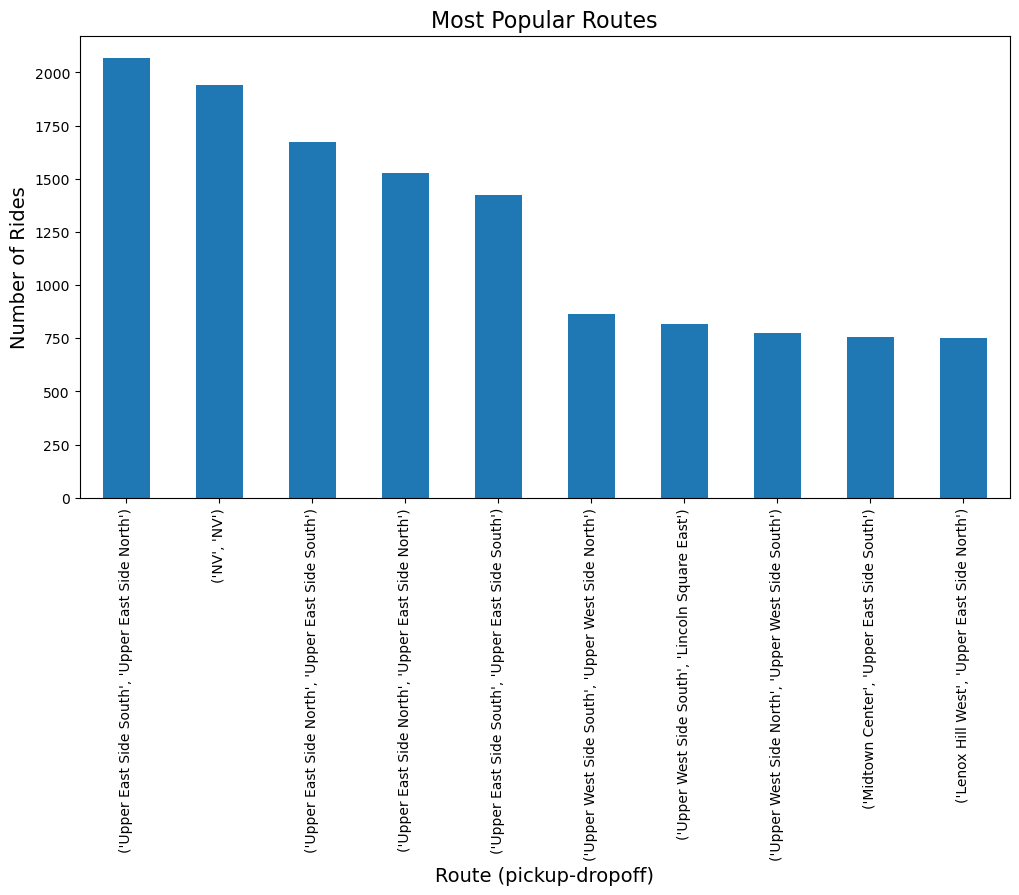

In [548]:
# Most popular routes
routes = df.groupby(['pickup_zone', 'dropoff_zone']).size().reset_index(name='counts')
routes_sorted = routes.sort_values('counts', ascending=False).head(10)

# Plot the most popular routes
plt.figure(figsize=(12,6))
routes_sorted['counts'].plot(kind='bar')
plt.title('Most Popular Routes', fontsize=16)
plt.xlabel('Route (pickup-dropoff)', fontsize=14)
plt.xticks(ticks=range(10), labels=list(zip(routes_sorted['pickup_zone'], routes_sorted['dropoff_zone'])))
plt.ylabel('Number of Rides', fontsize=14)
#plt.xticks(rotation=60)  # Set custom tick labels
plt.show()


#### Most Frequent Pickup and Dropoff Zones
The taxi data reveals distinct patterns in pickup and dropoff locations. The top five most common pickup and dropoff zones were the same, though their order varied slightly:

- __Upper East Side South:__ The southern part of the Upper East Side was the most popular pickup location, ranking first with 13,940 pickups, and the second most popular dropoff location, with 12,107 dropoffs.

- __Upper East Side North:__ This zone was the second most popular for pickups, with 12,720 pickups, and the most popular dropoff location, with 13,188 dropoffs.

- __Midtown Center:__ This zone ranked third for both pickups and dropoffs, with 11,411 and 10,568 respectively.

- __Penn Station/Madison Sq West:__ This zone was the fourth most popular pickup location with 10,673 pickups but did not make it to the top five dropoff locations.

- __Midtown East:__ This zone ranked fifth in pickups with 10,092 and sixth in dropoffs with 8,244.

JFK Airport, a major transport hub, also featured among the top pickup locations. However, it didn't appear among the top dropoff zones, suggesting that many people may be taking taxis from JFK but choosing other means of transport to get there.

#### Most Popular Routes
A deeper dive into the data reveals the most popular taxi routes. The analysis shows a clear trend of riders moving between the northern and southern parts of the Upper East Side, with these routes topping the list:

- __Upper East Side South to Upper East Side North:__ This was the most popular route, with 2,069 rides.

- __NV to NV:__ This category probably represents missing data where neither the pickup nor the dropoff location was recorded.

- __Upper East Side North to Upper East Side South:__ This was the third most popular route, with 1,673 rides.

Other routes among the top ten mainly include inter-zonal movements within the Upper West Side and from Midtown Center to Upper East Side South.

The popularity of routes within and between Upper East Side North and South indicates high taxi service demand in these areas. Understanding these patterns can help in better managing the taxi fleet distribution and in strategic decision-making for taxi services.

How has the average fare changed over time?
Is there a trend of fare variability based on the time of day, day of the week, or month?

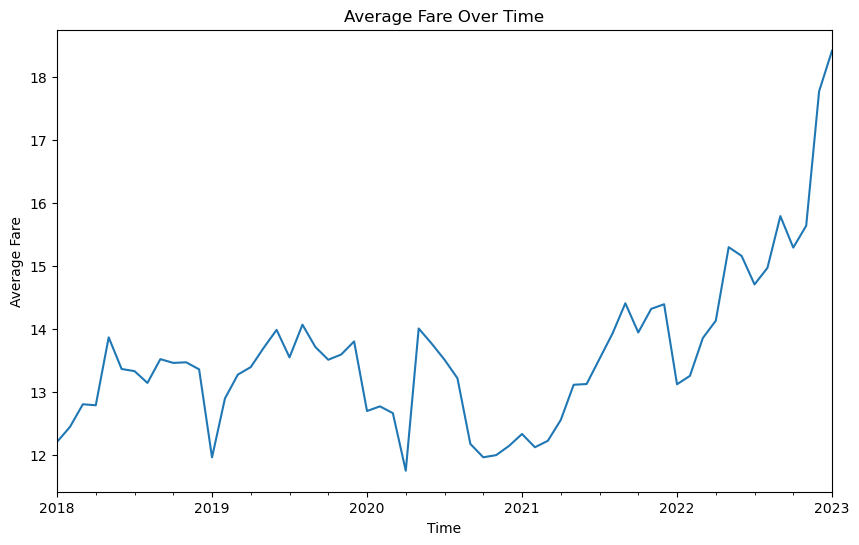

In [549]:
# Group by pickup datetime and calculate average fare
avg_fare_over_time = df.groupby(df['tpep_pickup_datetime'].dt.to_period("M"))['fare_amount'].mean()

# Plot the results
avg_fare_over_time.plot(kind='line', figsize=(10,6))
plt.title('Average Fare Over Time')
plt.xlabel('Time')
plt.ylabel('Average Fare')
plt.show()


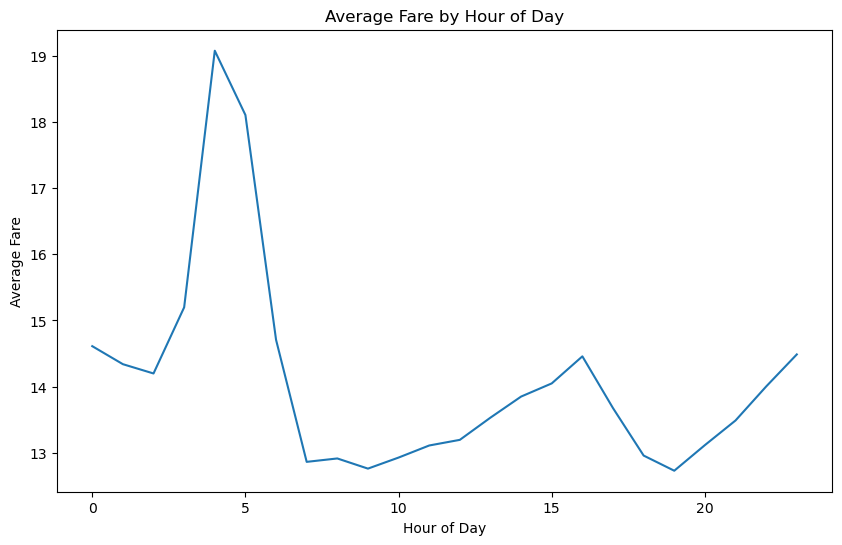

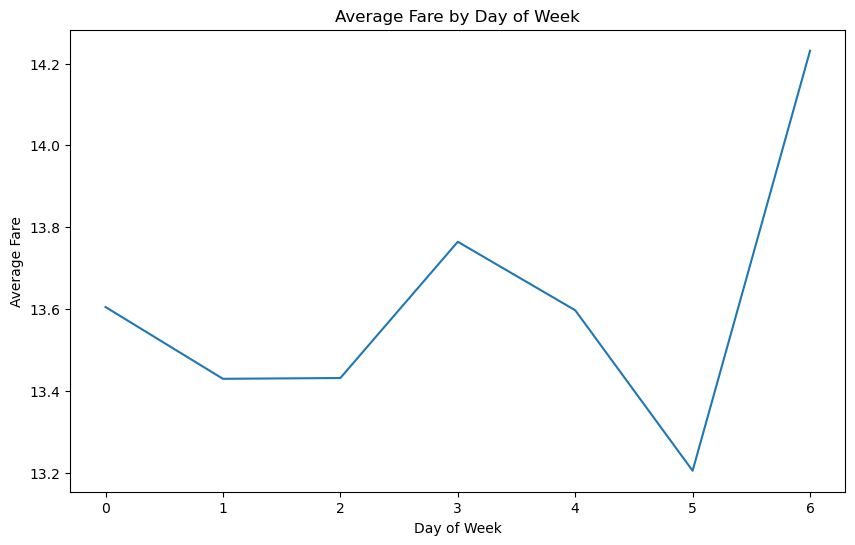

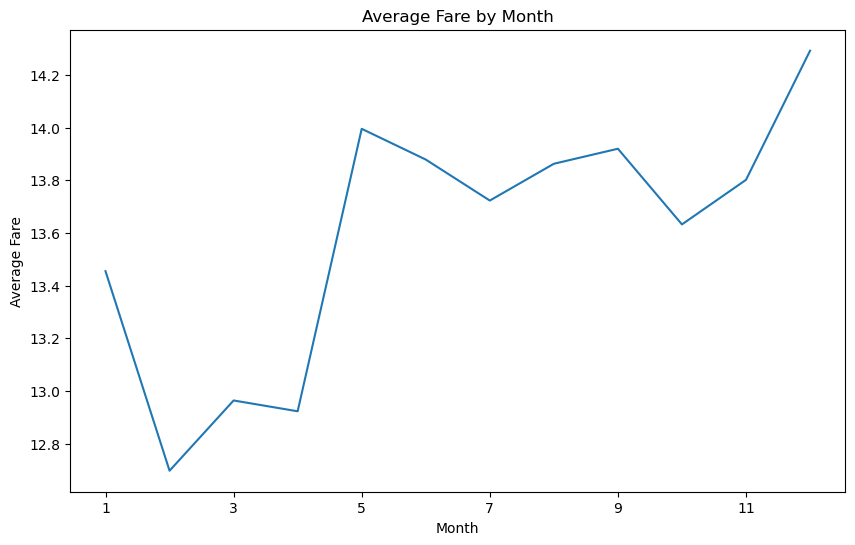

In [550]:
# Group by hour of day and calculate average fare
avg_fare_by_hour = df.groupby(df['pickup_hour'])['fare_amount'].mean()

ax = plt.axes()
# Plot the results
avg_fare_by_hour.plot(kind='line', figsize=(10,6))
plt.title('Average Fare by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Fare')
plt.show()

# Group by day of week and calculate average fare
avg_fare_by_day = df.groupby(df['pickup_day_of_week'])['fare_amount'].mean()

# Plot the results
avg_fare_by_day.plot(kind='line', figsize=(10,6))
plt.title('Average Fare by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Fare')
plt.show()

# Group by month and calculate average fare
avg_fare_by_month = df.groupby(df['pickup_month'])['fare_amount'].mean()

# Plot the results
avg_fare_by_month.plot(kind='line', figsize=(10,6))
plt.title('Average Fare by Month')
plt.xlabel('Month')
plt.ylabel('Average Fare')
plt.show()


__Average Fare Over Time__

The average taxi fare shows an overall increasing trend over the period from 2018 to 2023. There are a few peaks and troughs within this time frame, indicating some degree of seasonality or response to specific events:

- The fare peaks in December 2022 and January 2023, reaching the highest levels throughout the period.
- A notable dip can be seen in April 2020, potentially reflecting the impact of COVID-19 lockdowns and reduced mobility.
- From 2018 to 2021, there's a general upward trend with minor fluctuations, followed by a stronger upward trajectory from 2021 onward.

__Average Fare by Hour__

The analysis reveals certain patterns in average fare across different hours of the day:

- The highest average fares occur in the early morning hours, specifically around 4-5 AM.
- The lowest fares tend to be during regular business hours, from around 7 AM to 7 PM, reflecting common commuting times.
- Fares then gradually increase through the evening and into the night.

__Average Fare by Day of Week__

The day of the week also seems to affect the average fare:

- The highest average fare is observed on Sundays, followed closely by Thursdays.
- The lowest fare falls on Saturdays.

__Average Fare by Month__

In terms of monthly trends:

- The highest average fares occur in December and January.
- The lowest fares tend to occur in February.
- There is a general upward trend in average fare from January to December, which aligns with the trend seen in the average fare over time.

Tip trends:

What are the trends in tipping behavior?
Does the tip percentage change based on the time of the trip, duration, or distance?

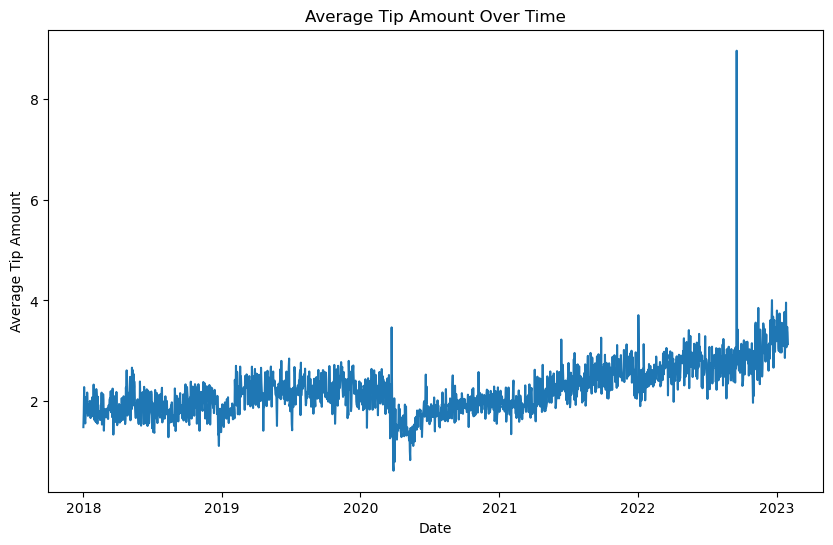

In [551]:
# Group by pickup date and calculate average tip
avg_tip_by_date = df.groupby(df['tpep_pickup_datetime'].dt.date)['tip_amount'].mean()

# Plot the results
avg_tip_by_date.plot(kind='line', figsize=(10,6))
plt.title('Average Tip Amount Over Time')
plt.xlabel('Date')
plt.ylabel('Average Tip Amount')
plt.show()


- From 2018 to March 2020, average taxi tips showed high variability with no clear trend.
- A slight decrease in tips was observed around March 2020, coinciding with the COVID-19 pandemic and related restrictions.
- Post-pandemic, from late 2020 to January 2023, there was a rising trend in average tips. This could be tied to economic recovery, inflation and changes in societal attitudes.
- Despite the observed trends, tips still showed considerable 'white noise', indicating that various factors can influence tipping behaviour.

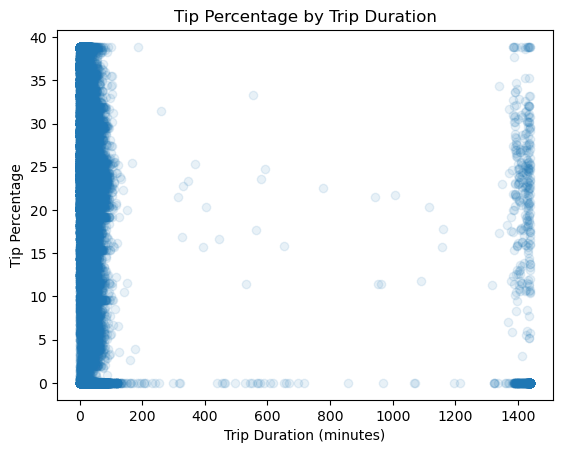

In [413]:
plt.scatter(df['trip_duration'], df['tip_percentage'], alpha=0.1)
plt.title('Tip Percentage by Trip Duration')
plt.xlabel('Trip Duration (minutes)')
plt.ylabel('Tip Percentage')
plt.show()


In [555]:
plt.figure(figsize=(10, 6))
plt.boxplot(df['tip_percentage'], by=df['trip_distance'])
plt.title('Tip Percentage by Trip Distance')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Tip Percentage')
plt.xticks(rotation=45)
plt.show()


TypeError: boxplot() got an unexpected keyword argument 'by'

<Figure size 1000x600 with 0 Axes>

Speed and efficiency:

Is there a trend in the average speed of trips?
Does the speed change based on the time of day or specific routes?

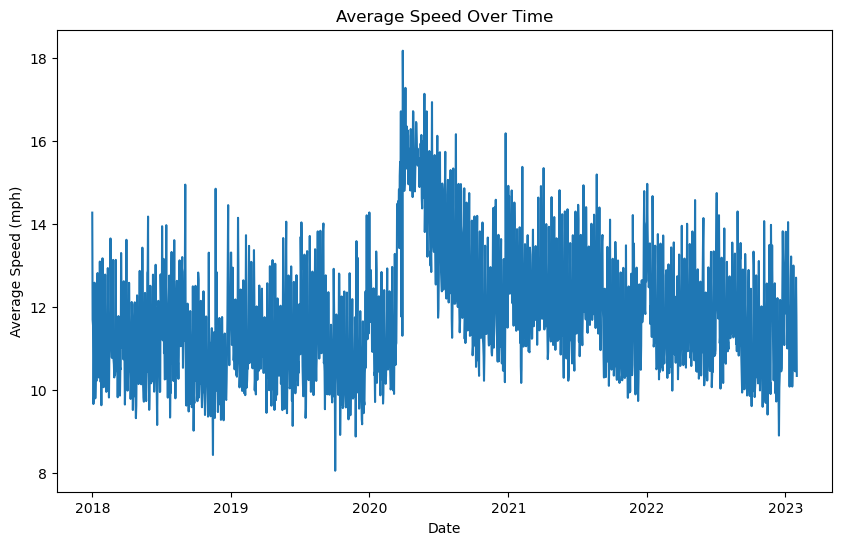

In [415]:
# Group by pickup date and calculate average speed
avg_speed_by_date = df.groupby(df['tpep_pickup_datetime'].dt.date)['average_speed_mph'].mean()

# Plot the results
avg_speed_by_date.plot(kind='line', figsize=(10,6))
plt.title('Average Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Average Speed (mph)')
plt.show()


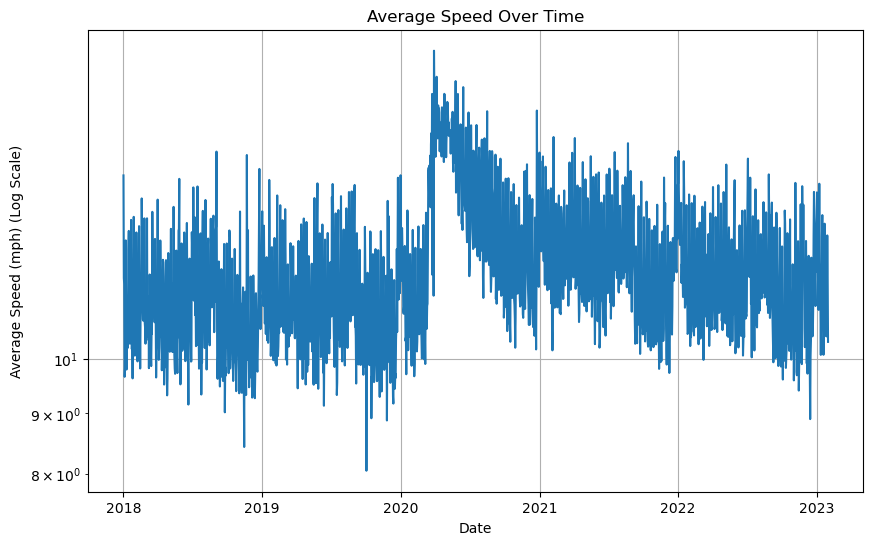

In [380]:
# Group by pickup date and calculate average speed
avg_speed_by_date = df.groupby(df['tpep_pickup_datetime'].dt.date)['average_speed_mph'].mean()

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot_date(avg_speed_by_date.index, avg_speed_by_date.values, '-')

# Setting the y-scale to logarithmic
plt.yscale('log')

plt.title('Average Speed Over Time')
plt.xlabel('Date')
plt.ylabel('Average Speed (mph) (Log Scale)')

plt.grid(True)
plt.show()

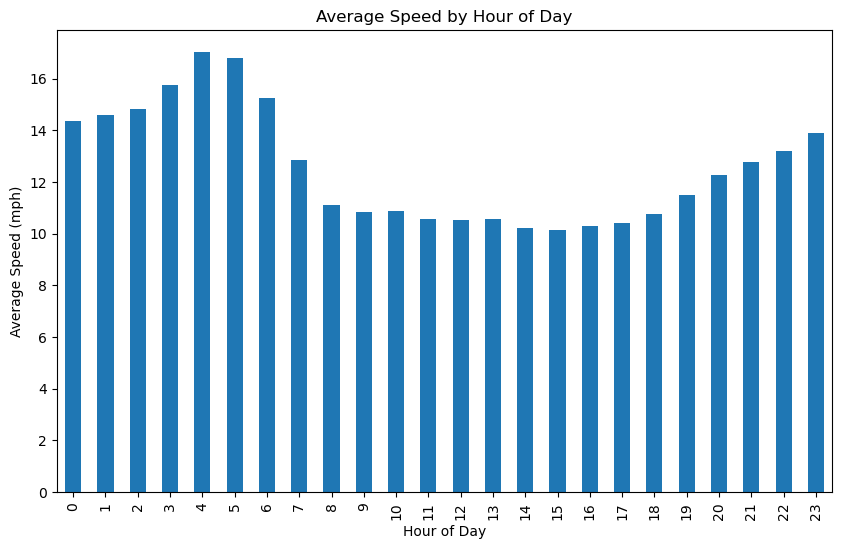

In [357]:
# Group by pickup hour and calculate average speed
avg_speed_by_hour = df.groupby(df['pickup_hour'])['average_speed_mph'].mean()

# Plot the results
avg_speed_by_hour.plot(kind='bar', figsize=(10,6))
plt.title('Average Speed by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Speed (mph)')
plt.show()


In [358]:
# Group by pickup and dropoff location and calculate average speed
df['route'] = df['PULocationID'].astype(str) + ' to ' + df['DOLocationID'].astype(str)
avg_speed_by_route = df.groupby('route')['average_speed_mph'].mean().sort_values(ascending=False)

# Display the top 10 fastest routes
avg_speed_by_route.head(10)


route
13 to 192     24.42
169 to 97     24.42
168 to 257    24.42
254 to 163    24.42
132 to 183    24.42
65 to 132     24.42
65 to 136     24.42
168 to 35     24.42
65 to 138     24.42
168 to 37     24.42
Name: average_speed_mph, dtype: float64

Passenger trends:

Is there a trend in the number of passengers per trip?
Do the number of passengers impact fare or tip amount?

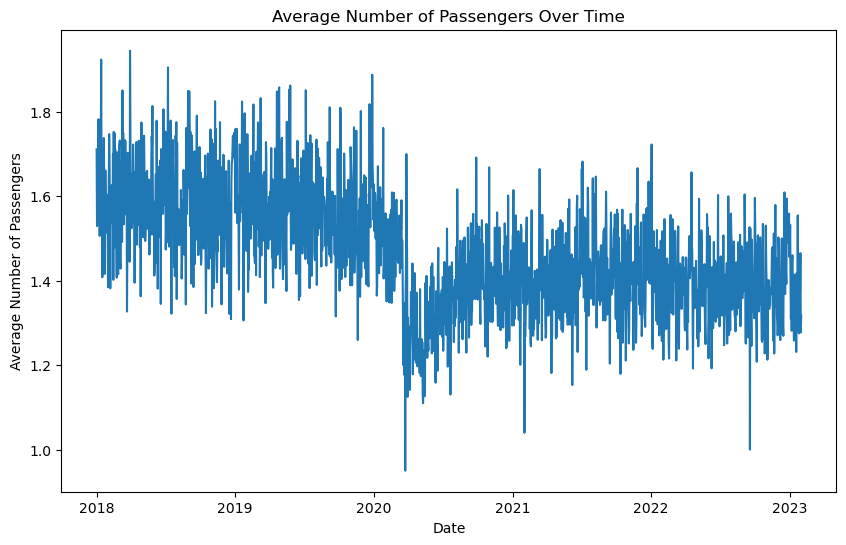

In [359]:
# Group by pickup date and calculate average passenger count
avg_passenger_by_date = df.groupby(df['tpep_pickup_datetime'].dt.date)['passenger_count'].mean()

# Plot the results
avg_passenger_by_date.plot(kind='line', figsize=(10,6))
plt.title('Average Number of Passengers Over Time')
plt.xlabel('Date')
plt.ylabel('Average Number of Passengers')
plt.show()


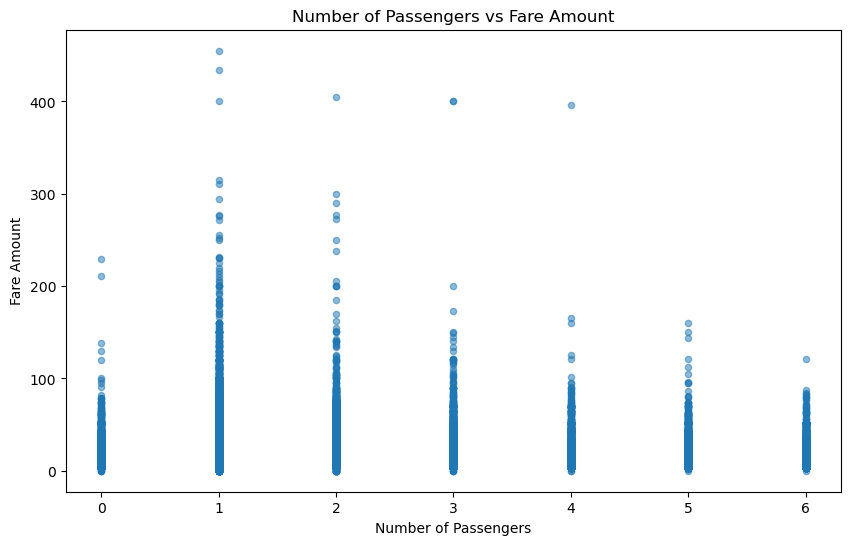

In [360]:
# Scatter plot of passenger count vs fare amount
df.plot(kind='scatter', x='passenger_count', y='fare_amount', alpha=0.5, figsize=(10,6))
plt.title('Number of Passengers vs Fare Amount')
plt.xlabel('Number of Passengers')
plt.ylabel('Fare Amount')
plt.show()


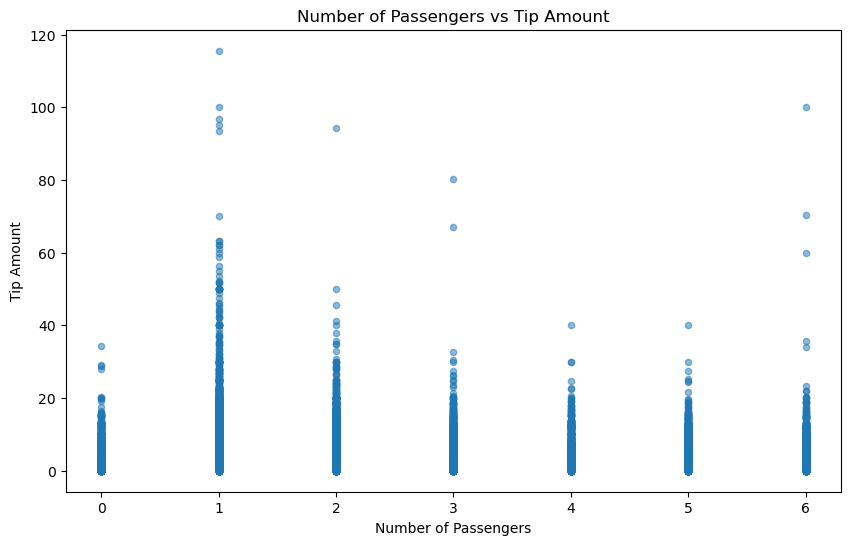

In [361]:
# Scatter plot of passenger count vs tip amount
df.plot(kind='scatter', x='passenger_count', y='tip_amount', alpha=0.5, figsize=(10,6))
plt.title('Number of Passengers vs Tip Amount')
plt.xlabel('Number of Passengers')
plt.ylabel('Tip Amount')
plt.show()


Airport trips:

What percentage of trips are to/from the airport and how has this changed over time?
Are there any specific trends noticeable in airport trips in terms of fare, tips, or duration?

Percentage of airport trips: 4.245552138187017%


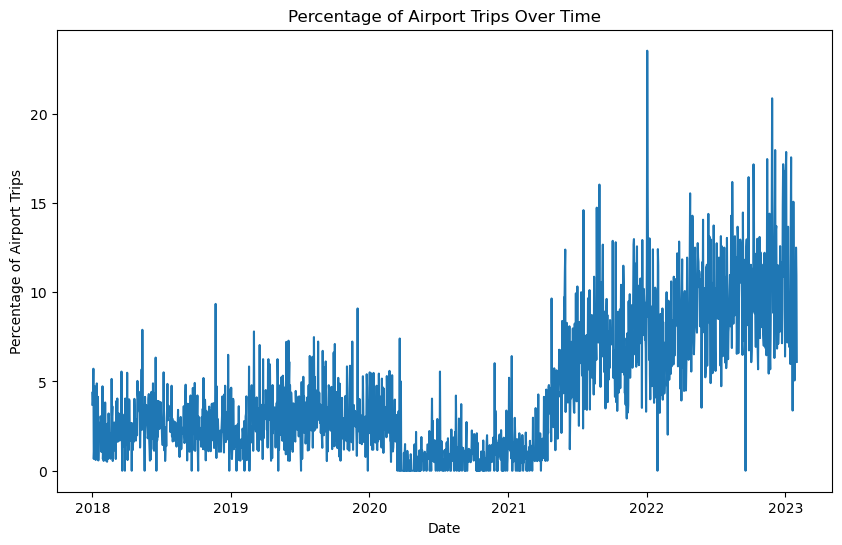

In [362]:
# Calculate total trips and total airport trips
total_trips = df.shape[0]
total_airport_trips = df['is_airport'].sum()

# Calculate percentage of airport trips
percentage_airport_trips = (total_airport_trips / total_trips) * 100
print(f"Percentage of airport trips: {percentage_airport_trips}%")

# Group by pickup date and calculate percentage of airport trips for each day
df['pickup_date'] = df['tpep_pickup_datetime'].dt.date
df_airport_by_date = df.groupby('pickup_date')['is_airport'].sum() / df.groupby('pickup_date')['is_airport'].count() * 100

# Plot the results
df_airport_by_date.plot(kind='line', figsize=(10,6))
plt.title('Percentage of Airport Trips Over Time')
plt.xlabel('Date')
plt.ylabel('Percentage of Airport Trips')
plt.show()


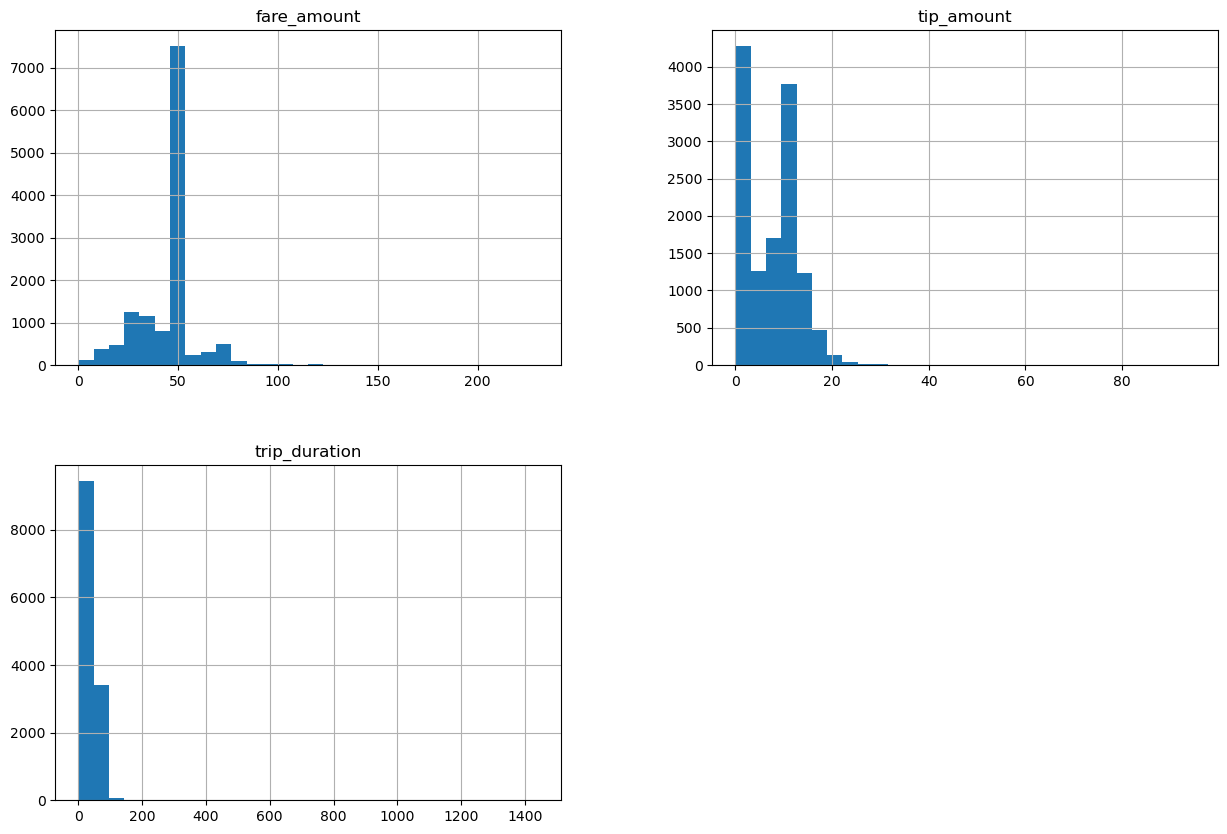

In [363]:
# Filter data for airport trips
df_airport = df[df['is_airport']]

# Plot histograms
df_airport[['fare_amount', 'tip_amount', 'trip_duration']].hist(bins=30, figsize=(15, 10))
plt.show()


Payment method trends:

What are the trends in the use of different payment methods?
Is there a correlation between the payment method and the tip amount or percentage?

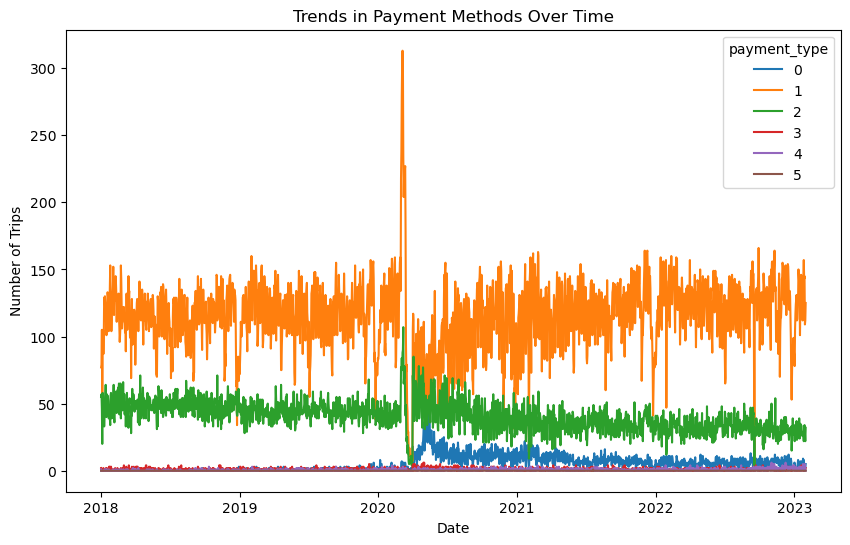

In [364]:
# Group by payment_type and count instances
payment_trends = df.groupby(['pickup_date', 'payment_type']).size().unstack()

# Plot the results
payment_trends.plot(kind='line', figsize=(10,6))
plt.title('Trends in Payment Methods Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Trips')
plt.show()


In [365]:
# Calculate average tip amount and percentage for each payment type
avg_tip_by_payment_type = df.groupby('payment_type')['tip_amount'].mean()
avg_tip_pct_by_payment_type = df.groupby('payment_type')['tip_percentage'].mean()

# Print the results
print("Average Tip Amount by Payment Type:")
print(avg_tip_by_payment_type)
print("\nAverage Tip Percentage by Payment Type:")
print(avg_tip_pct_by_payment_type)


Average Tip Amount by Payment Type:
payment_type
0    2.242764
1    3.031841
2    0.000291
3    0.008979
4    0.063603
5    0.000000
Name: tip_amount, dtype: float64

Average Tip Percentage by Payment Type:
payment_type
0    12.034001
1    24.291508
2     0.059664
3     4.259206
4    11.558684
5     0.000000
Name: tip_percentage, dtype: float64


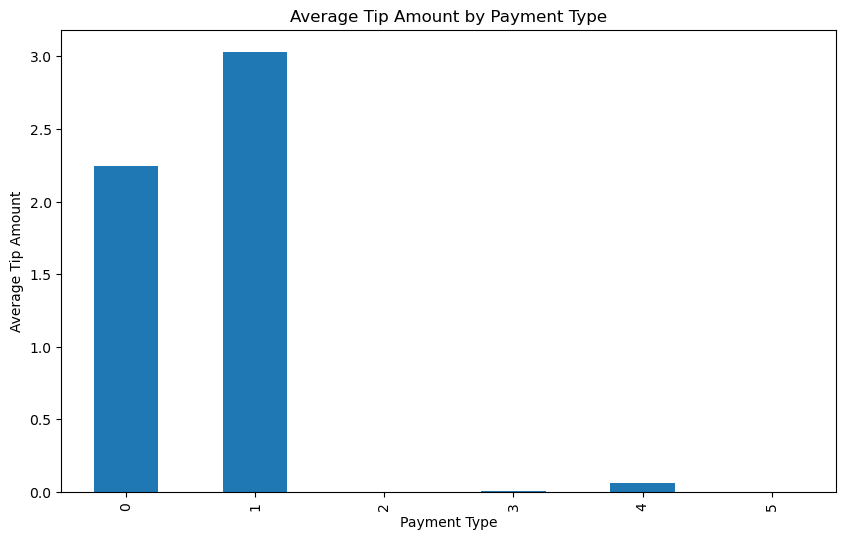

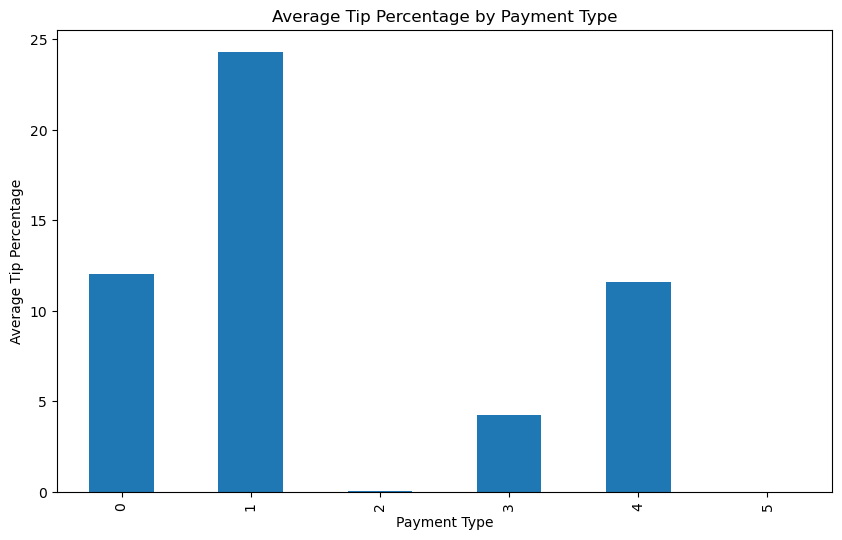

In [366]:
# Plot average tip amount by payment type
avg_tip_by_payment_type.plot(kind='bar', figsize=(10,6))
plt.title('Average Tip Amount by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Tip Amount')
plt.show()

# Plot average tip percentage by payment type
avg_tip_pct_by_payment_type.plot(kind='bar', figsize=(10,6))
plt.title('Average Tip Percentage by Payment Type')
plt.xlabel('Payment Type')
plt.ylabel('Average Tip Percentage')
plt.show()


# Conclusion and Management Summary
## Temporal Trends

My comprehensive analysis of taxi pickups over different time intervals provides important insights into service utilization patterns. These findings have several implications for operational efficiency, service delivery, and strategic planning.

- __Time of Day:__ Understanding that taxi pickups are lowest in the early hours of the morning (2-5 AM), and highest during evening commute and leisure hours (5-7 PM), can help taxi services optimize their operations. This can be done by scheduling fewer cars during the early morning hours, and increasing the availability during peak hours.

Day of Week: The busiest days for taxi pickups are mid-week, with numbers gradually decreasing towards the weekend, and the lowest numbers observed on Sundays. This information could be used to inform the weekly scheduling of drivers, allocating more drivers during the mid-week and less on Sundays.

Month of Year: With the demand remaining steady throughout the year, taxi services can anticipate a consistent demand and plan their operations accordingly. This predictability helps in efficient resource management and operational planning.

In conclusion, leveraging these temporal patterns in taxi service demand can significantly aid in streamlining operations. By aligning resources with demand fluctuations, taxi services can potentially reduce operational costs, improve customer service, and maximize overall business performance.

## Geographical Trends
My analysis of taxi trip data reveals insightful geographical trends that can aid in strategic decision-making for taxi service providers:

- __Upper East Side Dominance:__ The Upper East Side (both South and North) emerged as key zones for taxi activity. These areas were the most popular for both pickups and dropoffs, indicating a high demand for taxi services here. Taxi operators may need to focus resources in these areas to optimize service delivery.

- __Midtown Activity:__ Midtown Center and Midtown East also showed considerable taxi activity. Ensuring ample service coverage in these areas, particularly during peak business hours, could be beneficial.

- __Airport Travel:__ JFK Airport is a significant pickup location, suggesting that many passengers use taxis for their onward journey from the airport. However, it didn't feature prominently as a dropoff zone, hinting that travelers might be using other means of transport to get to the airport.

- __Intra-zonal Movement:__ The most frequent routes were within the same zones, particularly between Upper East Side South and North. This suggests a strong demand for short, intra-zone trips.

By understanding and leveraging these geographical trends, taxi services can better allocate resources, optimize routes, and effectively meet demand. This in turn can lead to improved customer satisfaction, increased usage, and potentially higher revenues.

## Fare Analysis
My analysis of taxi fare data reveals several key insights that can help taxi service providers to understand fare trends and potentially optimize their pricing strategies:

- __Fare Increases Over Time:__ The data suggests an overall increasing trend in average taxi fares over the past few years. This could be due to a variety of factors, such as increased operating costs or changes in demand. It will be important to continue monitoring these trends to make informed pricing decisions.

- __Time of Day Impact:__ We observed that the time of day significantly impacts the average fare, with the highest fares occurring in the early morning hours and the lowest fares during typical business hours. This could be due to lower demand or shorter trip distances during the day, and higher demand or longer trips early in the morning.

- __Weekly Fare Trends:__ Sundays and Thursdays appear to command the highest average fares, while Saturdays have the lowest. This could potentially be leveraged to offer dynamic pricing or promotions based on day-of-week trends.

- __Monthly Fare Trends:__ The data also shows monthly trends, with December and January having the highest average fares and February the lowest. These patterns may be related to seasonal demand changes and should be taken into account in pricing and operational strategies.

Understanding these trends can help taxi service providers enhance their pricing strategies, improve their services, and maximize their profitability.


Tip Trends: I'll uncover patterns in tipping behavior and determine if tip percentage changes based on factors like the time of the trip, duration, or distance.

Speed and Efficiency: I'll evaluate the average speed of trips and check if the speed fluctuates based on the time of day or specific routes.

Passenger Trends: I'll study if there's a trend in the number of passengers per trip and whether the number of passengers influences fare or tip amount.

Airport Trips: I'll calculate what percentage of trips are to/from the airport and how this has changed over time, as well as detect specific trends in airport trips in terms of fare, tips, or duration.

Payment Method Trends: Lastly, I'll assess trends in the use of different payment methods and find out if there's a correlation between the payment method and the tip amount or percentage.

In [197]:
import plotly.graph_objects as go

# First, we'll group by the date and count the number of rides per date.
ride_counts_by_date = df.groupby(df.tpep_pickup_datetime.dt.date).size().reset_index()
ride_counts_by_date.columns = ['date', 'ride_counts']

# Create a trace for the line plot
trace = go.Scatter(
    x = ride_counts_by_date['date'],
    y = ride_counts_by_date['ride_counts'],
    mode = 'lines',
    hovertemplate = '%{x}: %{y}<extra></extra>',  # custom hover format
    name = 'Ride Counts'
)

# Create the figure and add the trace
fig = go.Figure(data=[trace])

# Update layout
fig.update_layout(
    title='Number of Taxi Rides Over Time',
    xaxis_title='Date',
    yaxis_title='Number of Rides'
)

# Show the plot
fig.show()
